## 实现逻辑回归算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 使用鸢尾花数据集
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
# 由于逻辑回归只能处理二分类问题，而鸢尾花数据集是多分类的，所以处理一下，只要前两种类型，
# 同时为了后面方便绘制，只处理前两个特征
X = X[y < 2, :2]
y = y[y < 2]

In [5]:
X.shape

(100, 2)

In [6]:
y.shape

(100,)

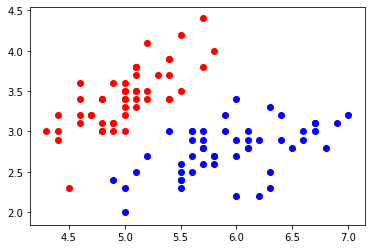

In [7]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue')
plt.show()

### 使用逻辑回归

In [8]:
from sklearn.model_selection import train_test_split
from playML09.LogisticRegression import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

total steps: 5401


1.0

In [10]:
log_reg.predict_proba(X_test)

array([0.88905679, 0.96895387, 0.21095353, 0.04128158, 0.07508952,
       0.04473232, 0.09328853, 0.9894529 , 0.95710672, 0.71027052,
       0.08643097, 0.01188062, 0.31831551, 0.07508952, 0.79626174,
       0.75785793, 0.78481915, 0.37176906, 0.11459689, 0.26925361,
       0.05174517, 0.23754539, 0.95710672, 0.97285329, 0.13360344])

In [11]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

In [12]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

## 来看看决策边界

In [14]:
def x2(x1):
    return - (log_reg.interception_ + log_reg.coefficients_[0] * x1) / log_reg.coefficients_[1]

In [19]:
x1_plot = np.linspace(4, 7, 50)
x2_plot = x2(x1_plot)

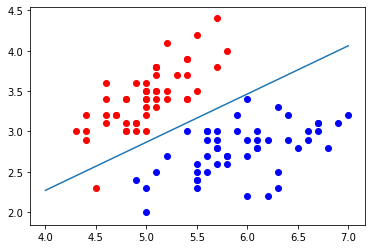

In [20]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue')
plt.plot(x1_plot, x2_plot)
plt.show()

In [21]:
# 如果新来的数据计算后的值正好在决策边界的线上，我们把它归类为 0 或 1 都是正确的。 实际情况很少发生

In [22]:
# 上面有一个红色点落到了蓝色区域，而上面我们算法的 accuracy score 是 1， 即100%， 
# 这是因为图中的点是全部的数据，而 accuracy score 只针对测试数据集。 如果只画出测试数据集就一致了：

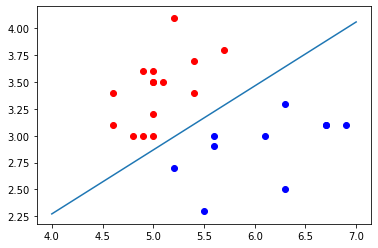

In [23]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='blue')
plt.plot(x1_plot, x2_plot)
plt.show()

### 绘制不规则的决策边界

In [24]:
# 下面定义的函数超出本课程内容，直接调用即可
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/richard/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


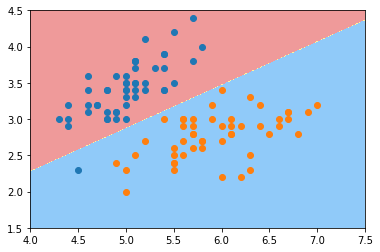

In [25]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### kNN 的决策边界

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
knn_clf.score(X_test, y_test)

1.0

/Users/richard/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


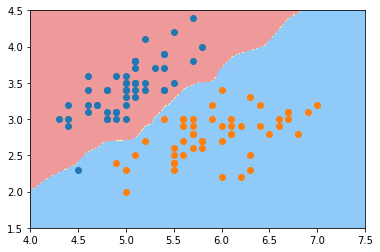

In [28]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [29]:
# 试试 kNN 的多分类属性

In [30]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

/Users/richard/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


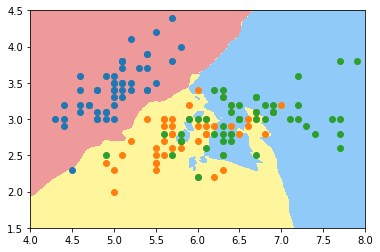

In [31]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

In [32]:
# 出现了复杂的图形，是因为 k=5 参数太小，模型为了拟合每一个细节。
# 对于 kNN 算法来说，k 设置的越大，模型就会越简单，图形更清晰。
# 把 k 改为 50 试试

/Users/richard/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


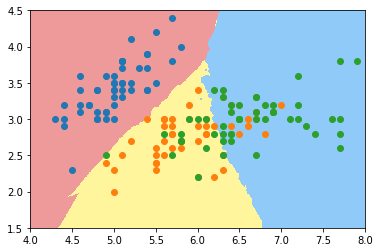

In [33]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()